<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Module%202/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Data Wrangling

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Handle missing values
*   Correct data format
*   Standardize and normalize data


<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ul>
    <li><a href="https://#identify_handle_missing_values">Identify and handle missing values</a>
        <ul>
            <li><a href="https://#identify_missing_values">Identify missing values</a></li>
            <li><a href="https://#deal_missing_values">Deal with missing values</a></li>
            <li><a href="https://#correct_data_format">Correct data format</a></li>
        </ul>
    </li>
    <li><a href="https://#data_standardization">Data standardization</a></li>
    <li><a href="https://#data_normalization">Data normalization (centering/scaling)</a></li>
    <li><a href="https://#binning">Binning</a></li>
    <li><a href="https://#indicator">Indicator variable</a></li>
</ul>

</div>

<hr>


<h2>What is the purpose of data wrangling?</h2>


Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.


<h3>Import data</h3>
<p>
You can find the "The Heart Failure Prediction Dataset" from the following link: <br><a href="https://www.kaggle.com/datasets/asgharalikhan/mortality-rate-heart-patient-pakistan-hospital" target="_blank">https://www.kaggle.com/datasets/asgharalikhan/mortality-rate-heart-patient-pakistan-hospital</a>. <br><br>
The statistical data obtained from <a href=\"https://www.kaggle.com/datasets/asgharalikhan/mortality-rate-heart-patient-pakistan-hospital\" target=\"_blank\">https://www.kaggle.com/datasets/asgharalikhan/mortality-rate-heart-patient-pakistan-hospital</a> under <a href=\"https://creativecommons.org/publicdomain/zero/1.0/\" target=\"_black\">CC0: Public Domain</a> license.
We will be using this dataset throughout this course.
</p>


<h4>Import pandas</h4> 


you are running the lab in your  browser, so we will install the libraries using `piplite`


In [476]:
# import piplite
# await piplite.install(['pandas'])
# await piplite.install(['matplotlib'])

If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:


In [477]:
#If you run the lab locally using Anaconda, you can load the correct library and versions by uncommenting the following:
#install specific version of libraries used in lab
#! mamba install pandas==1.3.3
#! mamba install numpy=1.21.2


In [478]:
import pandas as pd
import numpy as np
import random
import matplotlib.pylab as plt

This function will download the dataset into your browser


In [479]:
#This function will download the dataset into your browser 
# from pyodide.http import pyfetch
#
# async def download(url, filename):
#     response = await pyfetch(url)
#     if response.status == 200:
#         with open(filename, "wb") as f:
#             f.write(await response.bytes())



<h2>Reading the dataset from the URL and adding the related headers</h2>


First, we assign the URL of the dataset to "filename".


In [480]:
filename = "heart_failure_data.csv"

Then, we create a Python list <b>headers</b> containing name of headers.


In [481]:
headers = ["Age", "AgeGroup", "Gender", "Locality", "MaritalStatus", "Lifestyle", "Sleep", "Category", "Depression",
            "Hyperlipidemia", "Smoking", "Diabetes", "HTN", "Allergies", "BP", "Thrombolysis", "BGR", "CPK", "CK-MB",
            "ESR", "WBC", "RBC", "Hemoglobin", "PCV", "MCV", "MCH", "MCHC", "PlateletCount", "Neutrophil",
            "Lymphocyte", "Monocyte", "Eosinophil", "Others", "CO", "Diagnosis", "Hypersensitivity", "CP", "Trestbps", "Chol",
            "FBS", "Restecg", "Thalach", "Exang", "Oldpeak", "Slope", "CA", "Thal", "Num", "SK", "SKReact", "Reaction",
            "Mortality", "FollowUp"]

you will need to download the dataset; if you are running locally, please comment out the following


In [482]:
# await download(filename, "auto.csv")
# filename="auto.csv"

Use the Pandas method <b>read_csv()</b> to load the data from the web address.


In [483]:
df = pd.read_csv(filename)

Delete unnecessary columns and rename headers as we did in the previous lab.

In [484]:
columns = ["F.History", "Family.History", "B.Urea", "S.Cr", "S.Sodium", "S.Potassium", "S.Chloride"]
df = df.drop(columns=columns)
df.columns = headers

In [485]:
pd.options.display.float_format = '{:.2f}'.format

Use the method <b>head()</b> to display the first five rows of the dataframe.


In [486]:
# To see what the data set looks like, we'll use the head() method.
df.head()

,Age,AgeGroup,Gender,Locality,MaritalStatus,Lifestyle,Sleep,Category,Depression,Hyperlipidemia,...,Oldpeak,Slope,CA,Thal,Num,SK,SKReact,Reaction,Mortality,FollowUp
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.00,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.20,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.40,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.00,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.00,3,2,7,3,1,NO,0,0,34


<h4>Generate missing values</h4>

In order to show how to deal with missing values of dataframe in practice, we need to create NaN values in some columns. We will change "RBC", "Hemoglobin", "PCV", "Category", "Mortality" columns.

But before that we need to create new dataframe, so that we can compare it with original one and determine errors.

In [487]:
df2 = df.copy()

Now let's generate NaN values. We will do it randomly with <code>numpy.random</code> and replace values with <code>pandas.DataFrame.loc</code>

In [488]:
#Set percentage of NaN values in each column
col = {'RBC': 0.15, 'Hemoglobin': 0.1, 'PCV': 0.12, 'Category': 0.1, 'Mortality': 0.01}
#Create masks dictionary with positions of NaN values
masks = {}
#Replace values by NaN randomly
for c in col:
    m = np.random.rand(len(df2)) #creates arr of values from 0 to 1
    mask = m < col[c]
    masks.update({c:mask})
    df2.loc[mask, c] = np.NaN
df2

,Age,AgeGroup,Gender,Locality,MaritalStatus,Lifestyle,Sleep,Category,Depression,Hyperlipidemia,...,Oldpeak,Slope,CA,Thal,Num,SK,SKReact,Reaction,Mortality,FollowUp
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.00,2,0,7,2,1,NO,0,0.00,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.20,2,0,7,2,1,NO,0,0.00,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.40,2,0,3,2,1,NO,0,0.00,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,NaN,YES,YES,...,2.00,2,1,7,3,1,NO,0,0.00,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.00,3,2,7,3,1,NO,0,0.00,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,51-60,Male,URBAN,MARRIED,NO,NO,NaN,YES,NO,...,0.50,2,0,7,3,0,BODY.PAIN,1,0.00,60
364,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.00,2,3,7,3,1,STOMACH.BLEEDING,1,0.00,36
365,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.80,1,3,3,1,1,COUGH.BLEEDING,1,0.00,32
366,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2.60,2,0,7,4,1,COUGH.BLEEDING,1,0.00,32


As we can see, several NaN values appeared in the dataframe; those are missing values which may hinder our further analysis.

<div>So, how do we identify all those missing values and deal with them?</div>

<b>How to work with missing data?</b>

Steps for working with missing data:

<ol>
    <li>Identify missing data</li>
    <li>Deal with missing data</li>
    <li>Correct data format</li>
</ol>

<h2 id="identify_handle_missing_values">Identify and handle missing values</h2>
<h4>Evaluating for Missing Data</h4>

The missing values are converted by default. We use the following functions to identify these missing values. There are two methods to detect missing data:

<ol>
    <li><b>.isnull()</b></li>
    <li><b>.notnull()</b></li>
</ol>
The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data.


In [489]:
missing_data = df2[['Category', 'RBC', 'Hemoglobin', 'PCV', 'Mortality']].isnull()
missing_data.head(10)

,Category,RBC,Hemoglobin,PCV,Mortality
0,False,False,False,False,False
1,False,False,True,False,False
2,False,False,False,False,False
3,True,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,True,False


"True" means the value is a missing value while "False" means the value is not a missing value.


<h4>Count missing values in each column</h4>
<p>
Using a for loop in Python, we can quickly figure out the number of missing values in each column. As mentioned above, "True" represents a missing value and "False" means the value is present in the dataset.  In the body of the for loop the method ".value_counts()" counts the number of "True" values. 
</p>


In [490]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

Category
False    339
True      29
Name: Category, dtype: int64

RBC
False    310
True      58
Name: RBC, dtype: int64

Hemoglobin
False    335
True      33
Name: Hemoglobin, dtype: int64

PCV
False    326
True      42
Name: PCV, dtype: int64

Mortality
False    366
True       2
Name: Mortality, dtype: int64



Based on the summary above, each column has 368 rows of data and containing missing data:

<ol>
    <li>"Category": ~10% missing data</li>
    <li>"RBC": ~15% missing data</li>
    <li>"Hemoglobin": ~10% missing data</li>
    <li>"PCV": ~12% missing data</li>
    <li>"Mortality": ~1% missing data</li>
</ol>


<h3 id="deal_missing_values">Deal with missing data</h3>
<b>How to deal with missing data?</b>

<ol>
    <li>Drop data<br>
        a. Drop the whole row<br>
        b. Drop the whole column
    </li>
    <li>Replace data<br>
        a. Replace it by mean<br>
        b. Replace it by frequency<br>
        c. Replace it based on other functions
    </li>
</ol>


Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely.
We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others. We will apply each method to many different columns:

<b>Replace by mean:</b>

<ul>
    <li>"RBC": replace them with mean</li>
    <li>"Hemoglobin": replace them with mean</li>
    <li>"PCV": replace them with mean</li>
</ul>

<b>Replace by frequency:</b>

<ul>
    <li>"Category": replace them with "FREE".
        <ul>
            <li>Reason: 90% are "FREE". Since this value is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>

<ul>
    <li>"Mortality": simply delete the whole row
        <ul>
            <li>Reason: mortality is what we want to predict. Any data entry without mortality data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>


<h4>Calculate the mean value for the "RBC" column </h4>


In [491]:
avg_rbc = df2["RBC"].mean(axis=0)
print("Average of RBC:", round(avg_rbc, 2))

Average of RBC: 5.08


<h4>Replace "NaN" with mean value in "RBC" column</h4>


In [492]:
df2["RBC"].replace(np.nan, avg_rbc, inplace=True)

<h4>Calculate error between old and new values in "RBC" column</h4>
To calculate it we will use <code>sklearn.metrics.mean_absolute_percentage_error</code>. Mean absolute percentage error will show accuracy of recovery of missing values.

In [493]:
from sklearn.metrics import mean_absolute_percentage_error

mape_rbc = mean_absolute_percentage_error(df.loc[masks['RBC'], 'RBC'], df2.loc[masks['RBC'], 'RBC'])
print('Error of RBC: ', round(mape_rbc, 2))

Error of RBC:  0.14


<h4>Calculate the mean value for the "Hemoglobin" column</h4>


In [494]:
avg_hemoglobin = df2['Hemoglobin'].mean(axis=0)
print("Average of Hemoglobin:", round(avg_hemoglobin, 2))

Average of Hemoglobin: 13.9


<h4>Replace "NaN" with the mean value in the "Hemoglobin" column</h4>


In [495]:
df2["Hemoglobin"].replace(np.nan, int(avg_hemoglobin), inplace=True)

<h4>Calculate error between old and new values in "RBC" column</h4>

In [496]:
mape_hemoglobin = mean_absolute_percentage_error(df.loc[masks['Hemoglobin'], 'Hemoglobin'],
                                                 df2.loc[masks['Hemoglobin'], 'Hemoglobin'])
print("Error of Hemoglobin", round(mape_hemoglobin, 2))

Error of Hemoglobin 0.15


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1: </h1>

<b>Based on the example above, replace NaN in "PCV" column with the mean value and calculate the error.</b>

</div>


In [497]:
# Write your code below and press Shift+Enter to execute

<details><summary>Click here for the solution</summary>

```python
#Calculate the mean value for "PCV" column
avg_pcv = df2["PCV"].mean(axis = 0)
print("Average of PCV:", round(avg_pcv, 2))

# replace NaN by mean value in "PCV" column
df2["PCV"].replace(np.nan, avg_pcv, inplace = True)

# calculate the error
mape_pcv = mean_absolute_percentage_error(df.loc[masks['PCV'], 'PCV'],
                                                 df2.loc[masks['PCV'], 'PCV'])
print("Error of PCV", round(mape_pcv, 2))
```

</details>


To see which values are present in a particular column, we can use the ".value_counts()" method:


In [498]:
df2['Category'].value_counts()

FREE    307
PAID     32
Name: Category, dtype: int64

We can see that "FREE" is the most common value. We can also use the ".idxmax()" method to calculate the most common type automatically:


In [499]:
df2['Category'].value_counts().idxmax()

'FREE'

The replacement procedure is very similar to what we have seen previously:


In [500]:
df2["Category"].replace(np.nan, "FREE", inplace=True)

We can calculate error here as well, using <code>sklearn.metrics.confusion_matrix</code>. It will show how many values are recovered correctly. If there are numbers only in main diagonal of the matrix, all data has been recovered properly. And we can use <code>sklearn.metrics.recall_score</code> to see how many % of values are restored correctly.

In [501]:
from sklearn.metrics import confusion_matrix, recall_score
print(confusion_matrix(df.loc[masks['Category'], 'Category'], df2.loc[masks['Category'], 'Category']))

error = 1 - recall_score(df.loc[masks['Category'], 'Category'], df2.loc[masks['Category'], 'Category'], average='micro')
print("Error of MaritalStatus", round(error, 2))

[[24  0]
 [ 5  0]]
Error of MaritalStatus 0.17


Finally, let's drop all rows that do not have mortality data:


In [502]:
# simply drop whole row with NaN in "Mortality" column
df2.dropna(subset=["Mortality"], axis=0, inplace=True)

# reset index, because we dropped rows
df2.reset_index(drop=True, inplace=True)
df2

,Age,AgeGroup,Gender,Locality,MaritalStatus,Lifestyle,Sleep,Category,Depression,Hyperlipidemia,...,Oldpeak,Slope,CA,Thal,Num,SK,SKReact,Reaction,Mortality,FollowUp
0,45,41-50,Female,RURAL,MARRIED,NO,NO,FREE,YES,YES,...,3.00,2,0,7,2,1,NO,0,0.00,60
1,51,51-60,Female,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,1.20,2,0,7,2,1,NO,0,0.00,15
2,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,3.40,2,0,3,2,1,NO,0,0.00,6
3,55,51-60,Female,RURAL,MARRIED,YES,YES,FREE,YES,YES,...,2.00,2,1,7,3,1,NO,0,0.00,52
4,56,51-60,Female,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,4.00,3,2,7,3,1,NO,0,0.00,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,55,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,NO,...,0.50,2,0,7,3,0,BODY.PAIN,1,0.00,60
362,55,51-60,Male,RURAL,MARRIED,YES,NO,FREE,YES,YES,...,2.00,2,3,7,3,1,STOMACH.BLEEDING,1,0.00,36
363,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,0.80,1,3,3,1,1,COUGH.BLEEDING,1,0.00,32
364,58,51-60,Male,URBAN,MARRIED,NO,NO,FREE,YES,YES,...,2.60,2,0,7,4,1,COUGH.BLEEDING,1,0.00,32


<b>Good!</b> Now, we have a dataset with no missing values. So we can move back to initial dataset <code>df</code>, because it was only an example of how to fix missing values.


<h3 id="correct_data_format">Correct data format</h3>
<b>We are almost there!</b>
<p>The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).</p>

In Pandas, we use:

<p><b>.dtype()</b> to check the data type</p>
<p><b>.astype()</b> to change the data type</p>


<h4>Let's list the data types for each column</h4>


In [503]:
df.dtypes

Age                   int64
AgeGroup             object
Gender               object
Locality             object
MaritalStatus        object
Lifestyle            object
Sleep                object
Category             object
Depression           object
Hyperlipidemia       object
Smoking              object
Diabetes              int64
HTN                  object
Allergies            object
BP                  float64
Thrombolysis          int64
BGR                   int64
CPK                   int64
CK-MB                 int64
ESR                   int64
WBC                   int64
RBC                 float64
Hemoglobin          float64
PCV                 float64
MCV                 float64
MCH                 float64
MCHC                float64
PlateletCount         int64
Neutrophil          float64
Lymphocyte          float64
Monocyte            float64
Eosinophil            int64
Others               object
CO                   object
Diagnosis            object
Hypersensitivity    

<p>As we can see above, some columns are not of the correct data type. For example, there are columns such as "Lifestyle", "Sleep", "Depression", which have 'YES' and 'NO' values. We need to convert them into boolean type. Columns with string data, that can be divided into categories should have categorical type. We have to convert data types into a proper format for each column using the "astype()" method.</p>


<h4>Convert data types to proper format</h4>


Convert 'YES' and 'NO' values to boolean type using <code>pandas.Series.map</code>

In [504]:
col = ['Lifestyle', 'Sleep', 'Depression', 'Hyperlipidemia', 'Smoking', 'HTN', 'Allergies', 'Hypersensitivity']
for c in col:
    df[c] = df[c].map({'YES': True, 'NO': False})

Convert some object columns to category

In [505]:
col = ['AgeGroup', 'Gender', 'Locality', 'MaritalStatus', 'Category', 'SKReact', 'CP', 'Restecg', 'Slope', 'CA', 'Thal', 'Num']
df[col] = df[col].astype("category")

<h4>Let us list the columns after the conversion</h4>


In [506]:
df.dtypes

Age                    int64
AgeGroup            category
Gender              category
Locality            category
MaritalStatus       category
Lifestyle               bool
Sleep                   bool
Category            category
Depression              bool
Hyperlipidemia          bool
Smoking                 bool
Diabetes               int64
HTN                     bool
Allergies               bool
BP                   float64
Thrombolysis           int64
BGR                    int64
CPK                    int64
CK-MB                  int64
ESR                    int64
WBC                    int64
RBC                  float64
Hemoglobin           float64
PCV                  float64
MCV                  float64
MCH                  float64
MCHC                 float64
PlateletCount          int64
Neutrophil           float64
Lymphocyte           float64
Monocyte             float64
Eosinophil             int64
Others                object
CO                    object
Diagnosis     

<b>Wonderful!</b>

Now we have finally obtained the cleaned dataset with no missing values with all data in its proper format.


<h2 id="data_standardization">Data Standardization</h2>
<p>
Data is usually collected from different agencies in different formats.
(Data standardization is also a term for a particular type of data normalization where we subtract the mean and divide by the standard deviation.)
</p>

<b>What is standardization?</b>

<p>Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.
</p>

<b>Example</b>

<p>Transform mg/dL to mmol/L:</p>
<p>In our dataset, the columns "Hemoglobin" and "Chol" (Cholesterol) are represented by g/dL and mg/dL units.</p>
<p>We will need to apply <b>data transformation</b> to transform g/dL and mg/dL into mmol/L.</p>


<p>The formula for unit conversion of Hemoglobin is:<p>
mmol/L = g/dL * 0.6206
<p>We can do many mathematical operations directly in Pandas.</p>


In [507]:
df.head()

,Age,AgeGroup,Gender,Locality,MaritalStatus,Lifestyle,Sleep,Category,Depression,Hyperlipidemia,...,Oldpeak,Slope,CA,Thal,Num,SK,SKReact,Reaction,Mortality,FollowUp
0,45,41-50,Female,RURAL,MARRIED,False,False,FREE,True,True,...,3.00,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,False,False,FREE,True,True,...,1.20,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,True,True,FREE,True,True,...,3.40,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,True,True,FREE,True,True,...,2.00,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,True,False,FREE,True,True,...,4.00,3,2,7,3,1,NO,0,0,34


In [508]:
# Set Hemoglobin as mmol/L
df['Hemoglobin'] = df['Hemoglobin'] * 0.6206

# check your transformed data
df

,Age,AgeGroup,Gender,Locality,MaritalStatus,Lifestyle,Sleep,Category,Depression,Hyperlipidemia,...,Oldpeak,Slope,CA,Thal,Num,SK,SKReact,Reaction,Mortality,FollowUp
0,45,41-50,Female,RURAL,MARRIED,False,False,FREE,True,True,...,3.00,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,False,False,FREE,True,True,...,1.20,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,True,True,FREE,True,True,...,3.40,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,True,True,FREE,True,True,...,2.00,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,True,False,FREE,True,True,...,4.00,3,2,7,3,1,NO,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,51-60,Male,URBAN,MARRIED,False,False,FREE,True,False,...,0.50,2,0,7,3,0,BODY.PAIN,1,0,60
364,55,51-60,Male,RURAL,MARRIED,True,False,FREE,True,True,...,2.00,2,3,7,3,1,STOMACH.BLEEDING,1,0,36
365,58,51-60,Male,URBAN,MARRIED,False,False,FREE,True,True,...,0.80,1,3,3,1,1,COUGH.BLEEDING,1,0,32
366,58,51-60,Male,URBAN,MARRIED,False,False,FREE,True,True,...,2.60,2,0,7,4,1,COUGH.BLEEDING,1,0,32


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2: </h1>

<b>According to the example above, transform mg/dL to mmol/L in the column of "Chol".</b>
Formula:
mmol/L = mg/dL * 0.02586

</div>


In [509]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# transform mpg to L/100km by mathematical operation (235 divided by mpg)
df['Chol'] = df['Chol'] * 0.02586
df

```

</details>


Let's have a look at "Neutrophil" column. There is data distributed in range from 0 to 1, so that we can see percentage of neutrophil cells, but there are some fields with 83 value. We need to visualise it.

<AxesSubplot:>

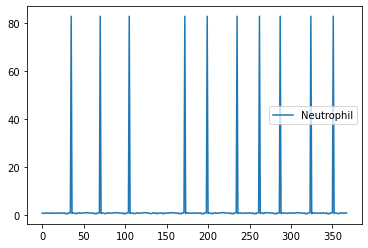

In [510]:
df[['Neutrophil']].plot()

Now we can see, that 10 incorrectly entered values must be fixed by dividing data higher than 1 by 100 and getting percentage in the correct form.

<AxesSubplot:>

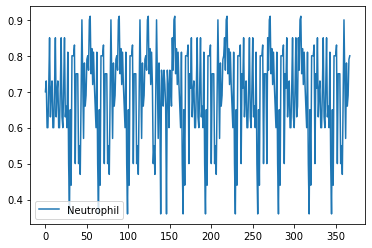

In [511]:
mask = df.Neutrophil > 1
df.loc[mask, 'Neutrophil'] = df['Neutrophil'] / 100
df[['Neutrophil']].plot()

Now we can see that it's correct, all data is in range from 0 to 1.

<h2 id="data_normalization">Data Normalization</h2>

<b>Why normalization?</b>

<p>Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling the variable so the variable values range from 0 to 1.
</p>

<b>Example</b>

<p>To demonstrate normalization, let's say we want to scale the columns "BP" and "Trestbps".</p>
<p><b>Target:</b> would like to normalize those variables so their value ranges from 0 to 1</p>
<p><b>Approach:</b> replace original value with value of <code>MinMaxScaler</code></p>


In [512]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
df['BP']  = scaler.fit_transform(df[['BP']])

df

,Age,AgeGroup,Gender,Locality,MaritalStatus,Lifestyle,Sleep,Category,Depression,Hyperlipidemia,...,Oldpeak,Slope,CA,Thal,Num,SK,SKReact,Reaction,Mortality,FollowUp
0,45,41-50,Female,RURAL,MARRIED,False,False,FREE,True,True,...,3.00,2,0,7,2,1,NO,0,0,60
1,51,51-60,Female,URBAN,MARRIED,False,False,FREE,True,True,...,1.20,2,0,7,2,1,NO,0,0,15
2,55,51-60,Female,RURAL,MARRIED,True,True,FREE,True,True,...,3.40,2,0,3,2,1,NO,0,0,6
3,55,51-60,Female,RURAL,MARRIED,True,True,FREE,True,True,...,2.00,2,1,7,3,1,NO,0,0,52
4,56,51-60,Female,RURAL,MARRIED,True,False,FREE,True,True,...,4.00,3,2,7,3,1,NO,0,0,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,55,51-60,Male,URBAN,MARRIED,False,False,FREE,True,False,...,0.50,2,0,7,3,0,BODY.PAIN,1,0,60
364,55,51-60,Male,RURAL,MARRIED,True,False,FREE,True,True,...,2.00,2,3,7,3,1,STOMACH.BLEEDING,1,0,36
365,58,51-60,Male,URBAN,MARRIED,False,False,FREE,True,True,...,0.80,1,3,3,1,1,COUGH.BLEEDING,1,0,32
366,58,51-60,Male,URBAN,MARRIED,False,False,FREE,True,True,...,2.60,2,0,7,4,1,COUGH.BLEEDING,1,0,32


<h4>Testing for normality using statistical tests</h4>
<p>Here we will check the normality of the sample distribution using such tests as: the Shapiro–Wilk test, the Kolmogorov–Smirnov test, and the D'Agostino's test.</p>

In [513]:
import scipy.stats as stats
values = df["BP"]

results = {
    "Shapiro–Wilk test" : stats.shapiro(values),
    "Kolmogorov–Smirnov" : stats.kstest(values, "norm"),
    "D'Agostino's test" : stats.normaltest(values)
}

pd.DataFrame.from_dict(results, orient = "index", columns = ["Test statistics", "Value p"])

,Test statistics,Value p
Shapiro–Wilk test,0.95,0.00
Kolmogorov–Smirnov,0.51,0.00
D'Agostino's test,19.37,0.00


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question #3: </h1>

<b>According to the example above, normalize the column "Trestbps".</b>

</div>


In [514]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
scaler = preprocessing.MinMaxScaler()
df['Trestbps']  = scaler.fit_transform(df[['Trestbps']])

df

```

</details>


Here we can see we've normalized "BP" and "Trestbps"in the range of \[0,1].


<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "Thalach" (maximum heart rate achieved) is a real valued variable ranging from 71 to 195 and it has 71 unique values. What if we only care about the difference between patients with high heart rate, medium heart rate and little heart rate (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'Thalach' column into 3 bins.</p>


<h3>Example of Binning Data In Pandas</h3>


Let's plot the histogram of max heart rate to see what the distribution looks like.


Text(0.5, 1.0, 'Max heart rate bins')

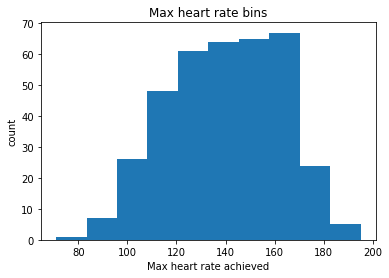

In [515]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["Thalach"])

# set x/y labels and plot title
plt.pyplot.xlabel("Max heart rate achieved")
plt.pyplot.ylabel("count")
plt.pyplot.title("Max heart rate bins")

<p>We would like 3 bins of equal size bandwidth so we use numpy's <code>linspace(start_value, end_value, numbers_generated</code> function.</p>
<p>Since we want to include the minimum value of heart rate, we want to set start_value = min(df["Thalach"]).</p>
<p>Since we want to include the maximum value of heart rate, we want to set end_value = max(df["Thalach"]).</p>
<p>Since we are building 3 bins of equal length, there should be 4 dividers, so numbers_generated = 4.</p>


We build a bin array with a minimum value to a maximum value by using the bandwidth calculated above. The values will determine when one bin ends and another begins.


In [516]:
bins = np.linspace(min(df["Thalach"]), max(df["Thalach"]), 4)
bins

array([ 71.        , 112.33333333, 153.66666667, 195.        ])

We set group  names:


In [517]:
group_names = ['Low', 'Medium', 'High']

We apply the function "cut" to determine what each value of `df['Thalach']` belongs to.


In [518]:
df['Thalach-binned'] = pd.cut(df['Thalach'], bins, labels=group_names, include_lowest=True )
df[['Thalach','Thalach-binned']].head(20)

,Thalach,Thalach-binned
0,136,Medium
1,142,Medium
2,117,Medium
3,130,Medium
4,133,Medium
5,150,Medium
6,123,Medium
7,174,High
8,152,Medium
9,146,Medium


Let's see the number of patients in each bin:


In [519]:
df['Thalach-binned'].value_counts()

Medium    192
High      128
Low        48
Name: Thalach-binned, dtype: int64

Let's plot the distribution of each bin:


Text(0.5, 1.0, 'Max heart rate bins')

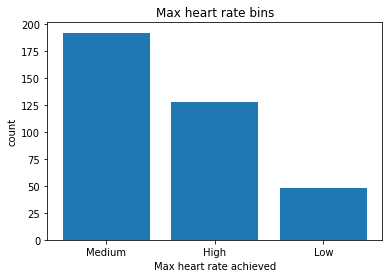

In [520]:
pyplot.bar(['Medium', 'High', 'Low'], df["Thalach-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("Max heart rate achieved")
plt.pyplot.ylabel("count")
plt.pyplot.title("Max heart rate bins")

<p>
    Look at the dataframe above carefully. You will find that the last column provides the bins for "Thalach" based on 3 categories ("Low", "Medium" and "High").
</p>
<p>
    We successfully narrowed down the intervals from 71 to 3!
</p>


<h3>Bins Visualization</h3>
Normally, a histogram is used to visualize the distribution of bins we created above. 


Text(0.5, 1.0, 'Max heart rate bins')

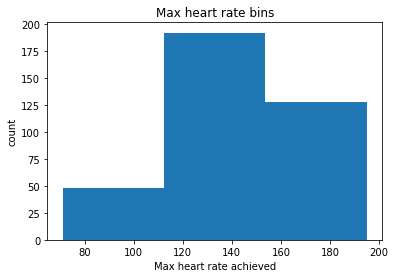

In [521]:
# draw historgram of attribute "horsepower" with bins = 3
plt.pyplot.hist(df["Thalach"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("Max heart rate achieved")
plt.pyplot.ylabel("count")
plt.pyplot.title("Max heart rate bins")

The plot above shows the binning result for the attribute "Thalach".


<h2 id="indicator">Indicator Variable (or Dummy Variable)</h2>
<b>What is an indicator variable?</b>
<p>
    An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning. 
</p>

<b>Why we use indicator variables?</b>

<p>
    We use indicator variables so we can use categorical variables for regression analysis in the later modules.
</p>
<b>Example</b>
<p>
    We see the column "Gender" has two unique values: "Male" or "Female". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "Gender" to indicator variables.
</p>

<p>
    We will use pandas' method 'get_dummies' to assign numerical values to different categories of fuel type. 
</p>


In [522]:
df.columns

Index(['Age', 'AgeGroup', 'Gender', 'Locality', 'MaritalStatus', 'Lifestyle',
       'Sleep', 'Category', 'Depression', 'Hyperlipidemia', 'Smoking',
       'Diabetes', 'HTN', 'Allergies', 'BP', 'Thrombolysis', 'BGR', 'CPK',
       'CK-MB', 'ESR', 'WBC', 'RBC', 'Hemoglobin', 'PCV', 'MCV', 'MCH', 'MCHC',
       'PlateletCount', 'Neutrophil', 'Lymphocyte', 'Monocyte', 'Eosinophil',
       'Others', 'CO', 'Diagnosis', 'Hypersensitivity', 'CP', 'Trestbps',
       'Chol', 'FBS', 'Restecg', 'Thalach', 'Exang', 'Oldpeak', 'Slope', 'CA',
       'Thal', 'Num', 'SK', 'SKReact', 'Reaction', 'Mortality', 'FollowUp',
       'Thalach-binned'],
      dtype='object')

Get the indicator variables and assign it to data frame "dummy_variable\_1":


In [523]:
dummy_variable_1 = pd.get_dummies(df["Gender"])
dummy_variable_1.head()

,Female,Male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


Change the column names for clarity:


In [524]:
dummy_variable_1.rename(columns={'Male':'Gender-male', 'Female':'Gender-female'}, inplace=True)
dummy_variable_1.head()

,Gender-female,Gender-male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In the dataframe, column 'Gender' has values for 'Male' and 'Female' as 0s and 1s now.


In [525]:
# merge data frame "df" and "dummy_variable_1"
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("Gender", axis = 1, inplace=True)
df.head()

,Age,AgeGroup,Locality,MaritalStatus,Lifestyle,Sleep,Category,Depression,Hyperlipidemia,Smoking,...,Thal,Num,SK,SKReact,Reaction,Mortality,FollowUp,Thalach-binned,Gender-female,Gender-male
0,45,41-50,RURAL,MARRIED,False,False,FREE,True,True,False,...,7,2,1,NO,0,0,60,Medium,1,0
1,51,51-60,URBAN,MARRIED,False,False,FREE,True,True,False,...,7,2,1,NO,0,0,15,Medium,1,0
2,55,51-60,RURAL,MARRIED,True,True,FREE,True,True,False,...,3,2,1,NO,0,0,6,Medium,1,0
3,55,51-60,RURAL,MARRIED,True,True,FREE,True,True,False,...,7,3,1,NO,0,0,52,Medium,1,0
4,56,51-60,RURAL,MARRIED,True,False,FREE,True,True,False,...,7,3,1,NO,0,0,34,Medium,1,0


The last two columns are now the indicator variable representation of the fuel-type variable. They're all 0s and 1s now.


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4: </h1>

<b>Similar to before, create an indicator variable for the column "Locality"</b>

</div>


In [526]:
# Write your code below and press Shift+Enter to execute

<details><summary>Click here for the solution</summary>

```python

# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['Locality'])

# change column names for clarity
dummy_variable_2.rename(columns={'URBAN':'Locality-urban', 'RURAL': 'Locality-rural'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()


```

</details>


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5: </h1>

<b>Merge the new dataframe to the original dataframe, then drop the column 'Locality'.</b>

</div>


In [527]:
# Write your code below and press Shift+Enter to execute 


<details><summary>Click here for the solution</summary>

```python
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('Locality', axis = 1, inplace=True)
df.dtypes

```

</details>


In [528]:
df.to_csv('clean_df.csv')

Save the new csv:

> Note : The  csv file cannot be viewed in the jupyterlite based SN labs environment.


### Thank you for completing this lab!

## Author

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Joseph Santarcangelo</a>

### Other Contributors

<a href="https://www.linkedin.com/in/mahdi-noorian-58219234/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Mahdi Noorian PhD</a>

Bahare Talayian

Eric Xiao

Steven Dong

Parizad

Hima Vasudevan

<a href="https://www.linkedin.com/in/fiorellawever/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDA0101ENSkillsNetwork20235326-2021-01-01" target="_blank">Fiorella Wenver</a>

<a href="https:// https://www.linkedin.com/in/yi-leng-yao-84451275/ " target="_blank" >Yi Yao</a>.

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | Change Description                  |
| ----------------- | ------- | ---------- | ----------------------------------- |
| 2022-04-22        | 2.3     | Lakshmi    | Made changes in markdown file       |
| 2020-10-30        | 2.2     | Lakshmi    | Changed URL of csv                  |
| 2020-09-09        | 2.1     | Lakshmi    | Updated Indicator Variables section |
| 2020-08-27        | 2.0     | Lavanya    | Moved lab to course repo in GitLab  |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
